In [2]:
import numpy as np


class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [3]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

In [4]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [19]:
import matplotlib.pyplot as plt

#--- 1. Set a global theme with a style sheet ---
plt.style.use('seaborn')

# --- 2. Make fine-grained global changes using plt.rcParams ---
# Note: We are now using 'plt.rcParams' directly.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['lines.linewidth'] = 2.5 # Make lines thicker by default

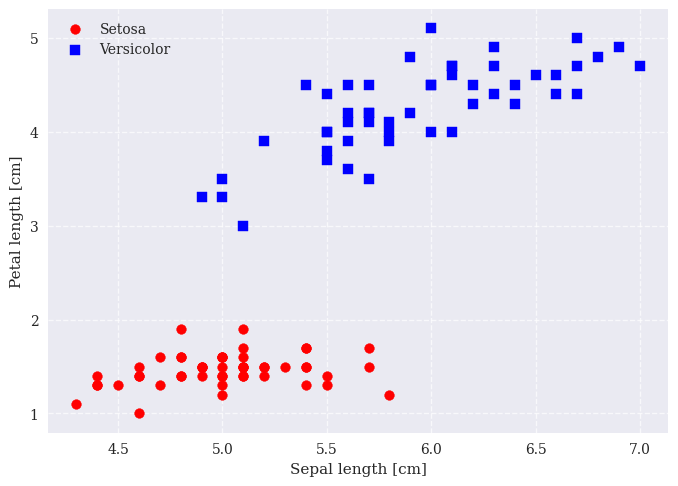

In [20]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# --- Plotting with the Explicit/Object-Oriented Way ---

# 1. Create a Figure object (fig) and an Axes object (ax)
fig, ax = plt.subplots()

# 2. Plot the data directly on the axes `ax`
ax.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='Setosa')
ax.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='s', label='Versicolor')

# 3. Set labels and legend on the axes `ax`
ax.set_xlabel('Sepal length [cm]')
ax.set_ylabel('Petal length [cm]')
ax.legend(loc='upper left')

# You can also add other elements like a grid to the axes
ax.grid(True, linestyle='--', alpha=0.7)

# 4. Display the plot
# plt.savefig('images/02_06_explicit.png', dpi=300)
plt.show()

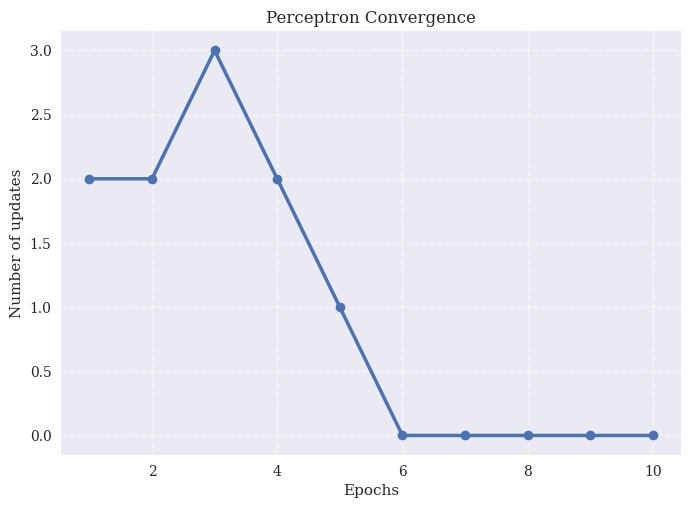

In [22]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

# --- Plotting Section (Converted to Explicit Style) ---

# 1. Create a Figure and an Axes object
fig, ax = plt.subplots()

# 2. Plot the data directly on the axes `ax`
ax.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_,
        marker='o')

# 3. Set labels and title on the axes `ax`
ax.set_xlabel('Epochs')
ax.set_ylabel('Number of updates')
ax.set_title('Perceptron Convergence')
ax.grid(True, linestyle='--', alpha=0.6)

# 4. Show the plot
# plt.savefig('images/02_07_explicit.png', dpi=300)
plt.show()

In [23]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, ax, resolution=0.02):
    """
    Plots the decision regions for a 2D dataset.

    Parameters
    ----------
    X : array-like, shape = [n_examples, 2]
      Feature Matrix.
    y : array-like, shape = [n_examples]
      True class labels.
    classifier : A classifier object with a .predict() method.
    ax : matplotlib.axes.Axes
      The axes object to plot on.
    resolution : float (default: 0.02)
      Resolution of the decision surface grid.
    """
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    
    # Use the passed-in 'ax' object for all plotting
    ax.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=f'Class {cl}',
                   edgecolor='black')

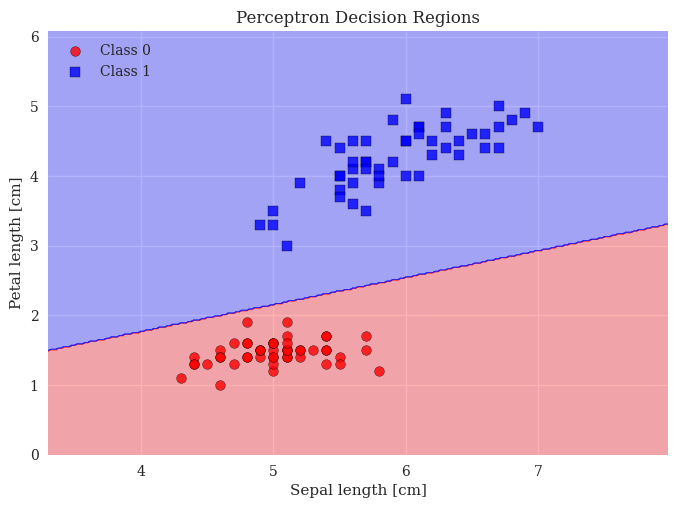

In [24]:
# 1. Create the Figure and Axes objects
fig, ax = plt.subplots()

# 2. Pass the axes object 'ax' to the plotting function
plot_decision_regions(X, y, classifier=ppn, ax=ax)

# 3. Now you can customize the plot further using the 'ax' object
ax.set_xlabel('Sepal length [cm]')
ax.set_ylabel('Petal length [cm]')
ax.set_title('Perceptron Decision Regions')
ax.legend(loc='upper left')

# 4. Show the final plot
plt.show()

In [25]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            
            #for w_j in range(self.w_.shape[0]):
            #    self.w_[w_j] += self.eta * (2.0 * (X[:, w_j]*errors)).mean()
            
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


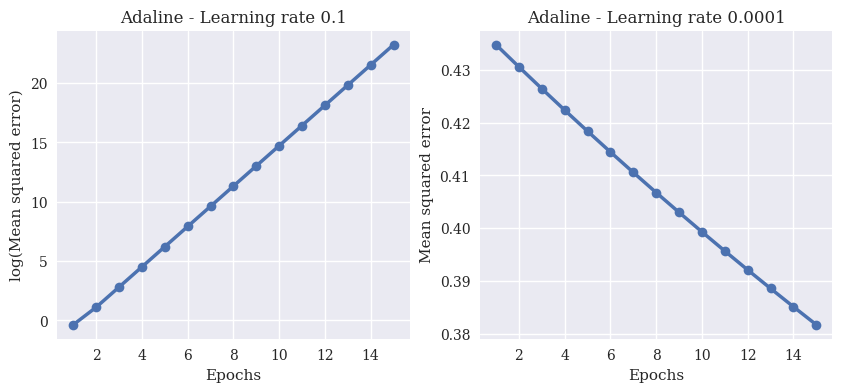

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()


In [28]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

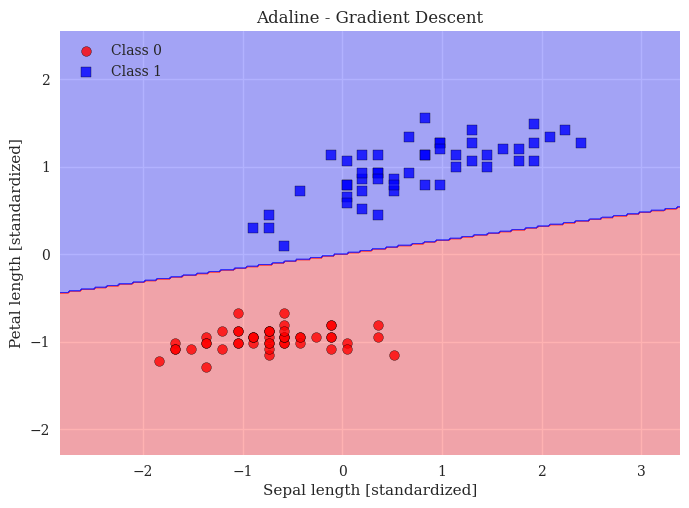

In [31]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

# 2. Create the Figure and Axes objects BEFORE calling the plot function
fig, ax = plt.subplots()

plot_decision_regions(X_std, y, classifier=ada_gd, ax=ax, resolution=0.02)

# 4. Use the 'ax' object to set titles and labels for consistency
ax.set_title('Adaline - Gradient Descent')
ax.set_xlabel('Sepal length [standardized]')
ax.set_ylabel('Petal length [standardized]')
ax.legend(loc='upper left')

# plt.tight_layout() # This is still a plt function and is fine to use
plt.show()

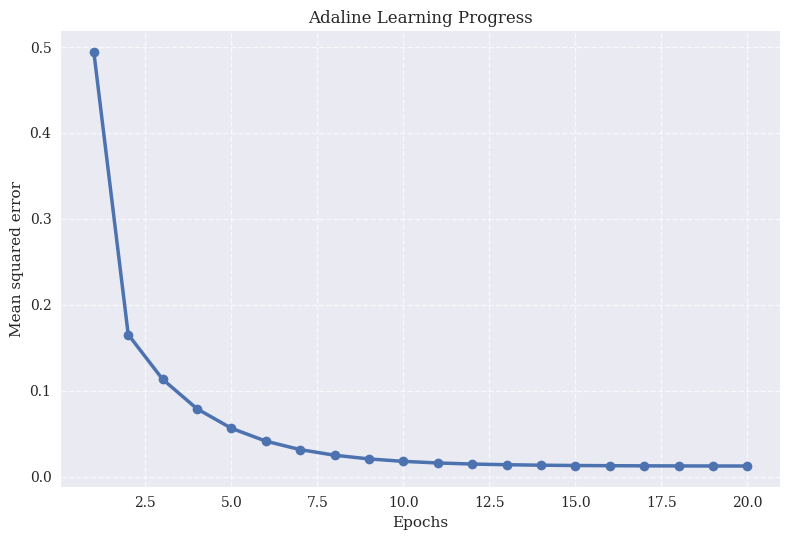

In [32]:
# --- Plotting Section (Converted to Explicit Style) ---

# 1. Create a Figure and an Axes object
fig, ax = plt.subplots()

# 2. Plot the data directly on the axes `ax`
ax.plot(range(1, len(ada_gd.losses_) + 1),
        ada_gd.losses_,
        marker='o')

# 3. Set labels and a title on the axes `ax`
ax.set_xlabel('Epochs')
ax.set_ylabel('Mean squared error')
ax.set_title('Adaline Learning Progress')
ax.grid(True, linestyle='--', alpha=0.7)


# 4. Apply layout adjustments to the figure `fig` and show the plot
fig.tight_layout()
# fig.savefig('images/02_14_2_explicit.png', dpi=300)
plt.show()

In [34]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [35]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

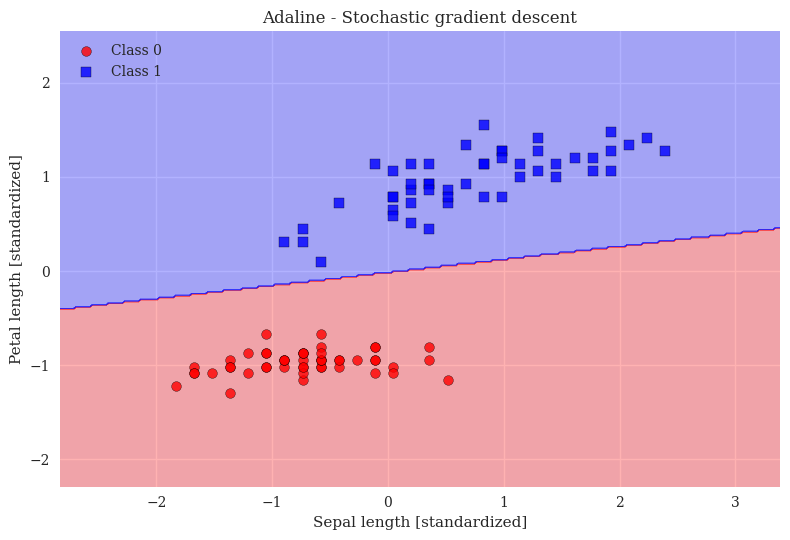

In [37]:
# Create the figure and axes
fig, ax = plt.subplots()

# Pass the axes object 'ax' to the plotting function and use it for settings
plot_decision_regions(X_std, y, classifier=ada_sgd, ax=ax)
ax.set_title('Adaline - Stochastic gradient descent')
ax.set_xlabel('Sepal length [standardized]')
ax.set_ylabel('Petal length [standardized]')
ax.legend(loc='upper left')

fig.tight_layout()

plt.show()

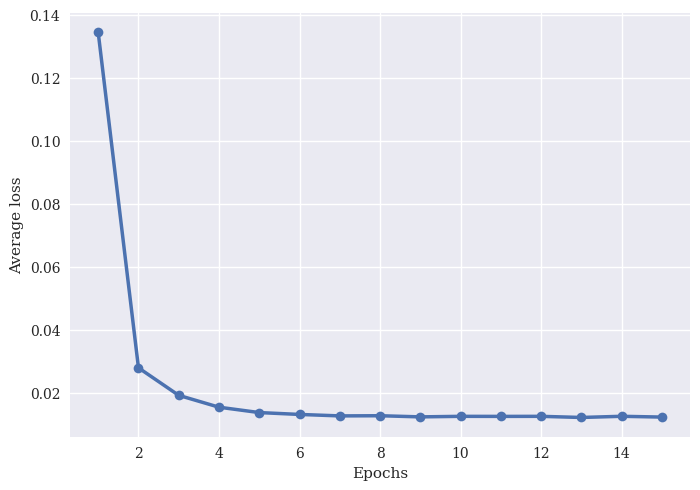

In [39]:
# Create a figure and an axes object
fig, ax = plt.subplots()

# Use the 'ax' object for all plotting commands
ax.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average loss')


plt.show()

In [40]:
ada_sgd.partial_fit(X_std[0, :], y[0])